## Project Milestone 4

Executing our second milestone approach and plotting the runtime.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
#Import data from csv files
df1 = pd.read_csv('favorite-tweets.csv')
df1 = df1.dropna()
df1['Text'] = df1['Text'].astype('str')


tweets = []
for i in df1['Text']:
    tweets.append(i)


df2 = pd.read_csv('Acronyms.csv')
df2 = df2.dropna()
df2['Acronym'] = df2['Acronym'].astype('str')
df2['Meaning'] = df2['Meaning'].astype('str')

acronyms = []
meaning = []
acron = []

for i in df2['Acronym']:
    acronyms.append(i)   
for i in df2['Meaning']:
    meaning.append(i)

# print(tweets)
# print(acronyms)
# print(meaning)


counter = 0
for i in acronyms:
    acron.append([i, meaning[counter]])
    counter = counter + 1

for index in range(len(tweets)):
    tweets[index] = tweets[index].lower().split()
# print(len(tweets)+1)

In [4]:
# these arrays will store the times taken and the and multiplier (ie 1/32th 1/31th ... size to the original of the acronym and tweet amounts)
times = []
multiplier = []
runs = 7

# print(acron[0][0][1])


# #Function:

# def slangCheck(tweet,acron):
#     # Do something with the value
#     print(tweet)

In [5]:
#Function:
def slangCheck(word,wb):
    if len(wb) == 1:                                     #base case: wb is a single value list
        if word == wb[0][0]:                             #if value is a match, return the meaning 
            return wb[0][1]
        else:                                            #else return the og word as is (not slang)
            return word
        
    else:                                                #if list length > 1
        p = int((len(wb))/2)                             #set p as halfway point
        
        if word[0:2] > wb[p][0][0:2]:                    #if the first two letters of word are further in alphabet...
            return slangCheck(word, wb[p:])              #split array and run slangCheck again w back end
            
        elif word[0:2] < wb[p][0][0:2]:                  #if the first two letters of word are further in alphabet...
            return slangCheck(word, wb[:p])              #split array and run slangCheck again w front end
            
        elif word[0:2] == wb[p][0][0:2]:                 #if the first two letters are the same...
            i = p                                        #starting from position [p]...
            while word[0:2] == wb[i][0][0:2]:            #traverse the right end of the list while the first two letters remain equal
                
                if word == wb[i][0]:                     #if a match is found, return the meaning
                    return wb[i][1]
                else:                                    #else continue searching
                    if i < len(wb) - 1:
                        i = i + 1
                    else:
                        return word
                    
            i = p - 1                                    #starting from position [p-1]...
            while word[0:2] == wb[i][0][0:2]:            #traverse the left end of the list while the first two letters remain equal
                
                if word == wb[i][0]:                     #if a match is found, return the meaning
                    return wb[i][1]
                else:                                    #else continue searching
                    if i < len(wb) - 1:
                        i = i - 1
                    else:
                        return word
                
            return word                                  #else return the og word as is (not slang)   
        

#Call function for each word in each tweet in tweets
for tweet in tweets:
    for word in tweet:
        word = str(slangCheck(word,acron))
#     print(slangCheck)

In [6]:
# slangCheck Algorithm
# loop for replacement of the acronyms, cut list in half w each function call in order to shorten search

# for troubleshooting
# print(tweets)
# print(tweets[0][5])
# print(tweets[0])

# these arrays will store the times taken and the and multiplier (ie 1/32th 1/31th ... size to the original of the acronym and tweet amounts)
times = []
multiplier = []
runs = 7


for index in range(1,runs):
    start = time.time()
    for i in range((len(tweets))*index//(5*runs)):
        
        for j in range(len(acron[0][0])*index//(50*runs)):

            for word in range(0,len(tweets[i])):
      
                if tweets[i][word] == acron[0][0][j]:
                    tweets[i][word] = acron[0][1][j]
    
    finish = time.time()
    # print(finish-start)
    # print(index)
    times.append(finish-start)  
    multiplier.append(index/runs)
             
# for i in range(len(tweets)//2):
#     for j in range(len(acron)//2):
#         if tweets[i] == acron[0][0][j]:
#             tweets[i] = acron[0][1][j]

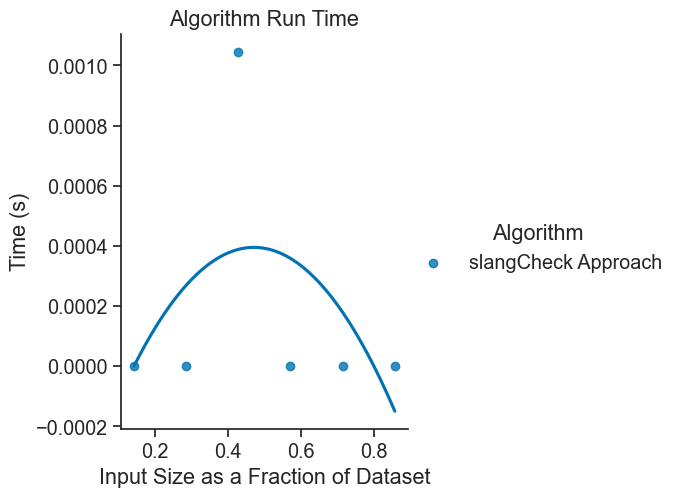

In [9]:
#Plotting our results
data = pd.DataFrame()
data['x'] = multiplier
data['y'] = times
data['Algorithm'] = 'slangCheck Approach'

#exp = pd.DataFrame()
#exp['x'] = data['x']
#exp['y'] = data['x']**2 #this is the line idk how to make this m*n but that's what im trying to do lol
#exp['Algorithm'] = 'Expected'

#results = pd.merge(data,exp, how = 'outer')
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
sns.lmplot(x='x',y='y', data=data, ci=None, hue='Algorithm', palette='colorblind', order=2, truncate=True).set(title='Algorithm Run Time',xlabel='Input Size as a Fraction of Dataset',ylabel='Time (s)')